In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [452]:
df=pd.read_csv('uae_properties.csv')
df.head(3)

,id,title,displayAddress,bathrooms,bedrooms,addedOn,type,rera,propertyType,price
0,10837871,★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GO...,"Sobha One, Sobha Hartland, Mohammed Bin Rashid...",2,3,2024-01-06T17:05:24+00:00,buy,817185656.00,apartment,3950000
1,10880180,"★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4%...","Sobha Verde, Jumeirah Lake Towers, Dubai",2,3,2024-01-13T21:19:31+00:00,buy,817185656.00,apartment,2600000
2,11220200,GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LI...,"Park Horizon, Dubai Hills Estate, Dubai",2,3,2024-03-12T03:18:54+00:00,buy,2125965775.00,apartment,3450000


<span style="color: orange; font-size: 30px;">Data Cleaning ✅</span>

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              492 non-null    int64  
 1   title           492 non-null    object 
 2   displayAddress  492 non-null    object 
 3   bathrooms       492 non-null    int64  
 4   bedrooms        492 non-null    int64  
 5   addedOn         492 non-null    object 
 6   type            492 non-null    object 
 7   rera            323 non-null    float64
 8   propertyType    492 non-null    object 
 9   price           492 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 38.6+ KB


In [454]:
df['addedOn']=pd.to_datetime(df['addedOn'])

In [455]:
(df['type'] == 'buy').sum()

np.int64(492)

In [456]:
(df['propertyType'] == 'apartment').sum()

np.int64(492)

In [457]:
df = df.drop(columns=['type' , 'propertyType' , 'rera'])

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              492 non-null    int64              
 1   title           492 non-null    object             
 2   displayAddress  492 non-null    object             
 3   bathrooms       492 non-null    int64              
 4   bedrooms        492 non-null    int64              
 5   addedOn         492 non-null    datetime64[ns, UTC]
 6   price           492 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 27.0+ KB


In [459]:
df.sample(5)

,id,title,displayAddress,bathrooms,bedrooms,addedOn,price
60,11041326,Burj Khalifa Views | Maids Room | Notice Given,"South Ridge 5, South Ridge, Downtown Dubai, Dubai",2,3,2024-02-09 12:28:50+00:00,4025000
289,11170967,Near Metro | Lagoon Views | Easy Payment Plan,"Azizi Venice, Dubai South (Dubai World Central...",2,0,2024-03-03 03:38:33+00:00,597000
318,10731225,Spacious 3BHK in Brand-new Tower | Pool View,"Radiant Square, City Of Lights, Al Reem Island...",2,3,2023-12-15 07:58:10+00:00,1250000
384,10800767,Private pool | 8-yrs PP I 1% monthly |,"Samana Barari Views, Majan, Dubai",2,0,2023-12-29 11:16:56+00:00,1800630
474,10984916,1% Payment Plan Damac Altitude,"Damac Towers, Business Bay, Dubai",2,0,2024-01-31 10:10:58+00:00,3920000


In [460]:
df['city']=df['displayAddress'].str.split(',').str[-1].str.strip()




In [461]:
df['city'].value_counts()

city
Dubai             307
Abu Dhabi         122
Sharjah            43
Ras Al Khaimah     14
Ajman               6
Name: count, dtype: int64

In [462]:
# df['displayAddress']=df['displayAddress'].str.split(',').str[:-1].str.join(',').str.strip()


In [463]:
df.columns

Index(['id', 'title', 'displayAddress', 'bathrooms', 'bedrooms', 'addedOn',
       'price', 'city'],
      dtype='object')

In [464]:
df=df[['id', 'addedOn', 'title', 'displayAddress', 'city', 'bathrooms', 'bedrooms',
       'price']]

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              492 non-null    int64              
 1   addedOn         492 non-null    datetime64[ns, UTC]
 2   title           492 non-null    object             
 3   displayAddress  492 non-null    object             
 4   city            492 non-null    object             
 5   bathrooms       492 non-null    int64              
 6   bedrooms        492 non-null    int64              
 7   price           492 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 30.9+ KB


<span style="color: red; font-size: 40px;">Data Cleaning Completed ✅</span>

<div style="background: linear-gradient(to right,rgb(3, 12, 14),rgb(227, 55, 106)); height: 40px; border: none;"></div>


<span style="color: orange; font-size: 30px;">City-Wise Analysis of Apartment Prices ✅</span>




In [466]:
df.head()

,id,addedOn,title,displayAddress,city,bathrooms,bedrooms,price
0,10837871,2024-01-06 17:05:24+00:00,★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GO...,"Sobha One, Sobha Hartland, Mohammed Bin Rashid...",Dubai,2,3,3950000
1,10880180,2024-01-13 21:19:31+00:00,"★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4%...","Sobha Verde, Jumeirah Lake Towers, Dubai",Dubai,2,3,2600000
2,11220200,2024-03-12 03:18:54+00:00,GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LI...,"Park Horizon, Dubai Hills Estate, Dubai",Dubai,2,3,3450000
3,11176502,2024-03-04 06:53:51+00:00,Prime Location | Corner Spacious Unit | Bright...,"AZIZI Riviera, Meydan One, Meydan, Dubai",Dubai,2,3,2000000
4,11179908,2024-03-04 13:24:39+00:00,Very Limited | Ideal For Investment | 40% Disc...,"Verdana, Dubai Investment Park, Dubai",Dubai,2,0,284000


In [467]:
df1=df.groupby('city')['price'].agg(mean='mean' , count='count').reset_index()
df1=df1.sort_values('mean' , ascending=False)
df1

,city,mean,count
3,Ras Al Khaimah,2812816.93,14
2,Dubai,2587408.98,307
0,Abu Dhabi,1411758.56,122
4,Sharjah,1348680.23,43
1,Ajman,328666.67,6


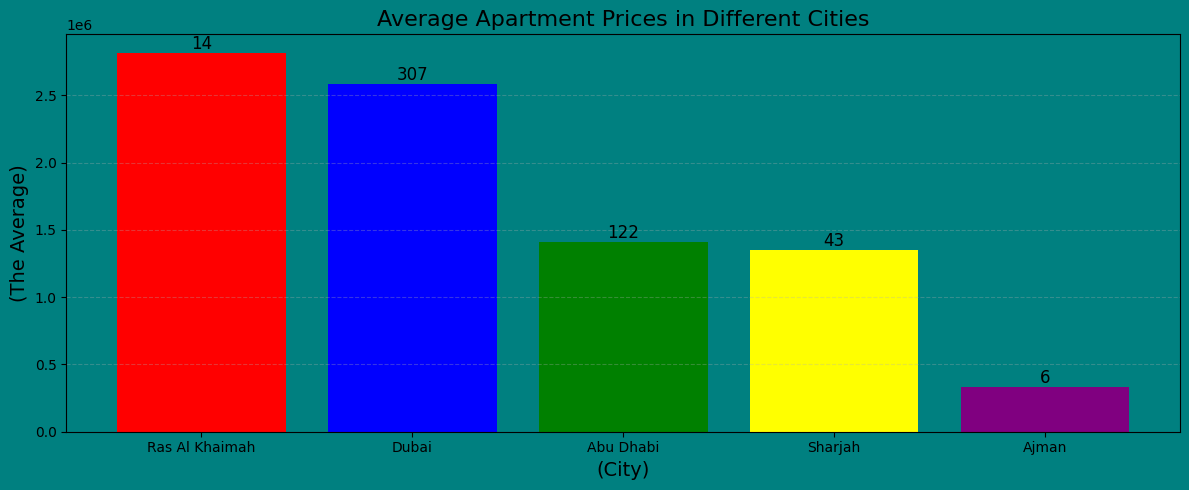

In [468]:
plt.figure(figsize=(12,5) , facecolor='teal')
bars=plt.bar(data=df1 , x='city' , height='mean' ,color=['red', 'blue', 'green', 'yellow', 'purple'])
plt.bar_label(bars, labels=df1['count'].astype(str), fontsize=12)
plt.gca().set_facecolor('teal')
plt.title('Average Apartment Prices in Different Cities' , fontsize=16)
plt.xlabel('(City)' , fontsize=14)
plt.ylabel('(The Average)' , fontsize=14)
plt.grid(axis='y',alpha=0.3 , linestyle='--')

plt.tight_layout()
plt.show()



<div style="background: linear-gradient(to right,rgb(3, 12, 14),rgb(227, 55, 106)); height: 40px; border: none;"></div>


<span style="color: orange; font-size: 30px;">the relationship between descret and price ✅</span>




In [469]:
df.head()

,id,addedOn,title,displayAddress,city,bathrooms,bedrooms,price
0,10837871,2024-01-06 17:05:24+00:00,★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GO...,"Sobha One, Sobha Hartland, Mohammed Bin Rashid...",Dubai,2,3,3950000
1,10880180,2024-01-13 21:19:31+00:00,"★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4%...","Sobha Verde, Jumeirah Lake Towers, Dubai",Dubai,2,3,2600000
2,11220200,2024-03-12 03:18:54+00:00,GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LI...,"Park Horizon, Dubai Hills Estate, Dubai",Dubai,2,3,3450000
3,11176502,2024-03-04 06:53:51+00:00,Prime Location | Corner Spacious Unit | Bright...,"AZIZI Riviera, Meydan One, Meydan, Dubai",Dubai,2,3,2000000
4,11179908,2024-03-04 13:24:39+00:00,Very Limited | Ideal For Investment | 40% Disc...,"Verdana, Dubai Investment Park, Dubai",Dubai,2,0,284000


In [470]:
df['displayAddress'].count() - df['displayAddress'].nunique()

np.int64(243)

In [471]:
print(f'{df['price'].mean() : .2f}')

 2166491.44


10 most expensive areas in the UAE

In [472]:
df2=df.groupby('displayAddress')['price'].mean().to_frame().sort_values('price' , ascending=False).head(10)

df2

,price
displayAddress,
"Apartment Building 7, Bluewaters Residences, Bluewaters, Dubai",14500000.00
"Palm Beach Towers 1, Palm Beach Towers, Palm Jumeirah, Dubai",12803400.00
"SLS Residences the Palm, Palm Jumeirah, Dubai",12046000.00
"The Fairmont Palm Residence North, The Fairmont Palm Residences, Palm Jumeirah, Dubai",11500000.00
"Mamsha Al Saadiyat, Saadiyat Cultural District, Saadiyat Island, Abu Dhabi",11000000.00
"The Address Dubai Mall, Downtown Dubai, Dubai",10000000.00
"Peninsula Four, Peninsula, Business Bay, Dubai",8196000.00
"Jumeirah Gate Tower 1, The Address Jumeirah Resort and Spa, Jumeirah Beach Residence, Dubai",8150000.00
"The Address Residences Dubai Opera Tower 1, The Address Residences Dubai Opera, Downtown Dubai, Dubai",8000000.00


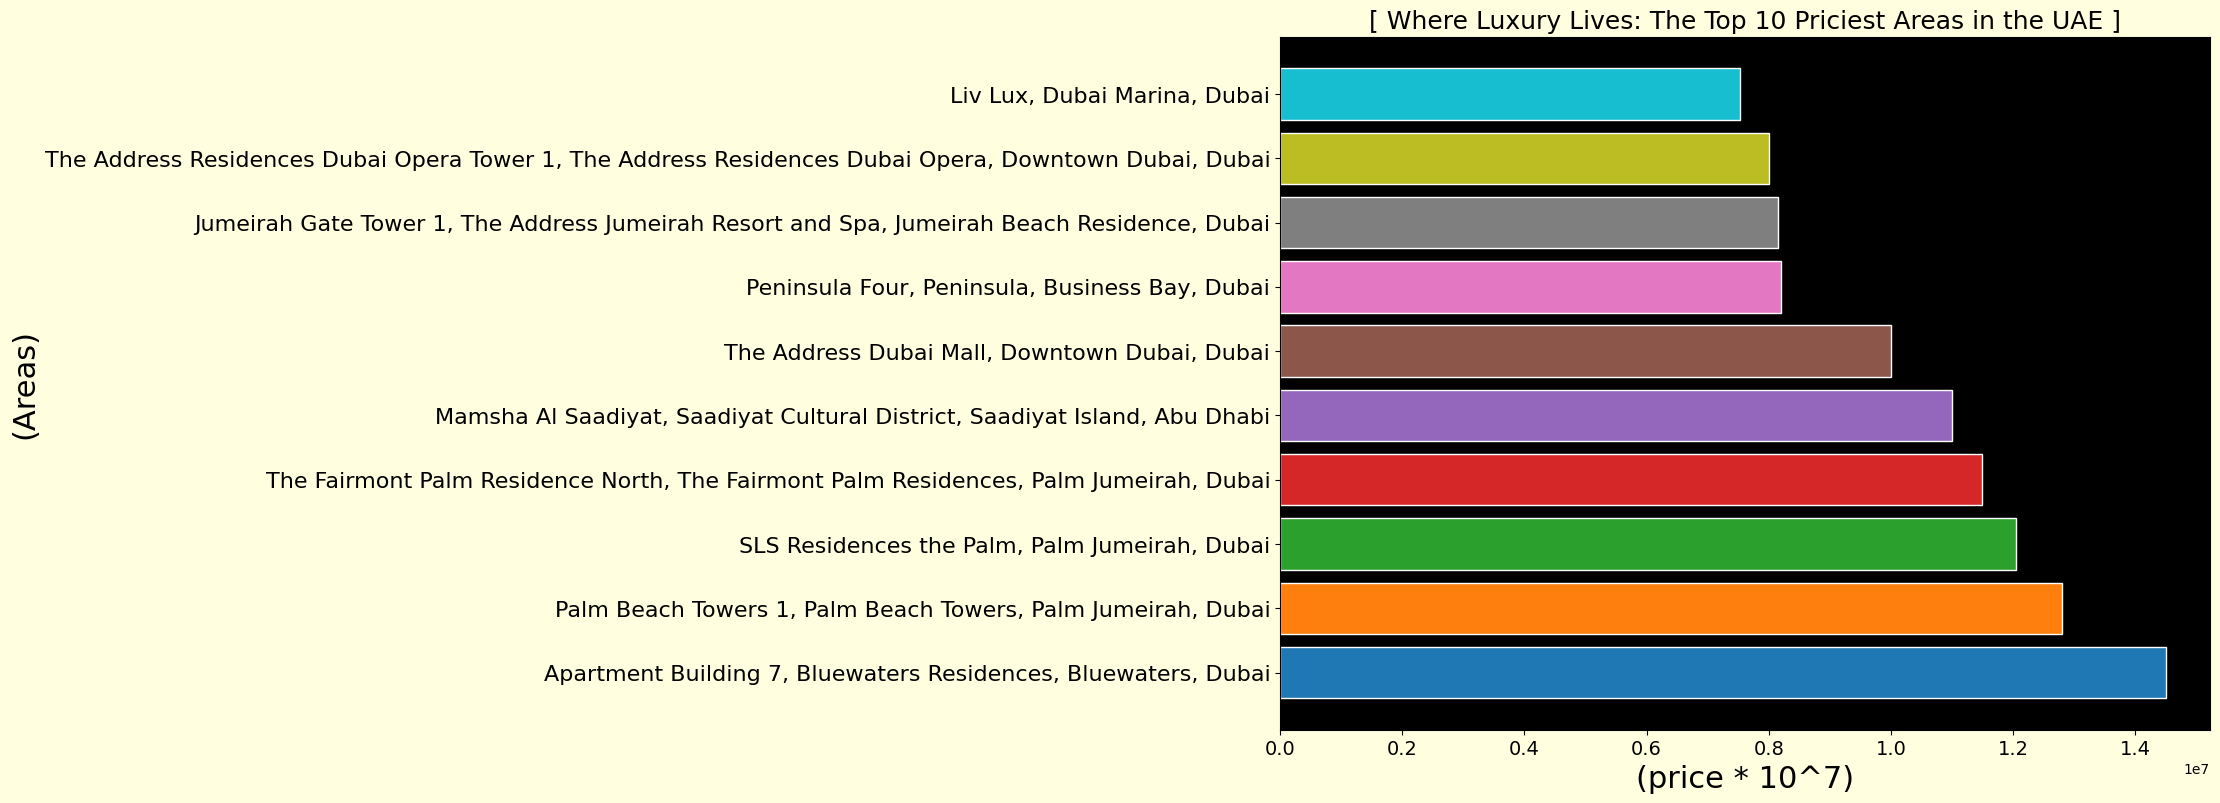

In [473]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
          '#bcbd22', '#17becf']

plt.figure(figsize=(12 , 9) , facecolor='lightyellow')
plt.barh(data=df2 , width='price' , y=df2.index , color=colors , edgecolor='white')
plt.gca().set_facecolor('black')
plt.xticks(rotation=0 , fontsize=14)
plt.title('[ Where Luxury Lives: The Top 10 Priciest Areas in the UAE ]' , fontsize=18)
plt.xlabel('(price * 10^7)' , fontsize=22)
plt.ylabel('(Areas)' , fontsize=22)
plt.yticks(fontsize=16)
plt.show()

<div style="background: linear-gradient(to right,rgb(3, 12, 14),rgb(227, 55, 106)); height: 40px; border: none;"></div>


<span style="color: orange; font-size: 30px;">Average Price of 3-Bedroom Apartments in Dubai After Removing Outliers✅</span>




In [474]:
df.head()

,id,addedOn,title,displayAddress,city,bathrooms,bedrooms,price
0,10837871,2024-01-06 17:05:24+00:00,★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GO...,"Sobha One, Sobha Hartland, Mohammed Bin Rashid...",Dubai,2,3,3950000
1,10880180,2024-01-13 21:19:31+00:00,"★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4%...","Sobha Verde, Jumeirah Lake Towers, Dubai",Dubai,2,3,2600000
2,11220200,2024-03-12 03:18:54+00:00,GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LI...,"Park Horizon, Dubai Hills Estate, Dubai",Dubai,2,3,3450000
3,11176502,2024-03-04 06:53:51+00:00,Prime Location | Corner Spacious Unit | Bright...,"AZIZI Riviera, Meydan One, Meydan, Dubai",Dubai,2,3,2000000
4,11179908,2024-03-04 13:24:39+00:00,Very Limited | Ideal For Investment | 40% Disc...,"Verdana, Dubai Investment Park, Dubai",Dubai,2,0,284000


In [475]:
df3=df[df['bedrooms'] == 3]

In [476]:
df3=df3[df3['city'] == 'Dubai']
df3.sample(5)

,id,addedOn,title,displayAddress,city,bathrooms,bedrooms,price
185,10156369,2023-08-22 11:43:47+00:00,Penthouse | Amazing Water View | VOT,"The Torch, Dubai Marina, Dubai",Dubai,2,3,6800000
454,10587631,2023-11-17 03:04:32+00:00,Genuine Resale|Payment Plan| Furnished| Near M...,"Golf Views Seven City, Jumeirah Lake Towers, D...",Dubai,2,3,2000000
192,10433272,2023-10-19 07:02:13+00:00,3BR Brand New | Premium Building | Near Metro,"The Nook 2, The Nook, Wasl Gate, Dubai",Dubai,2,3,1550000
490,11151144,2024-02-28 07:11:49+00:00,Full Burj Khalifa | High Floor | Confirm Seller,"Boulevard Point, Downtown Dubai, Dubai",Dubai,2,3,6600000
61,10888882,2024-01-15 14:24:54+00:00,Popular Views | Spacious W/ Post Payment,"Palm Beach Towers 1, Palm Beach Towers, Palm J...",Dubai,2,3,12803400


In [477]:
df3['price'].describe().to_frame()

,price
count,197.00
mean,3559830.11
std,2567010.00
min,899990.00
25%,1780000.00
50%,2500000.00
75%,4500000.00
max,14500000.00


In [478]:
px.box(df3['price'])

* the outlier more than 8.5 Maleon

In [482]:
df3=df3[df3['price'] <= 8500000]
df3['price'].max()


np.int64(8500000)

In [485]:
print(f'{df3['price'].mean() : .2f}')

 3135356.06


<span style="color: yellow; font-size: 30px;">Average Price of 3-Bedroom Apartments in Dubai is : (3.1) Maleon✅</span>




<div style="background: linear-gradient(to right,rgb(3, 12, 14),rgb(227, 55, 106)); height: 100px; border: none;"></div>
